In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, linregress
import os
from datetime import datetime
import sys
sys.path.append('/home/wallacelab/complexity-final/Optimizations')

import optimization

In [2]:
# Parameters
num_simulations = 1  # Number of simulations to run
task_name = "complexity_prediction"

# Dynamically generate predictor column names '0' through '48'
predictor_columns = [str(i) for i in range(49)]

all_weights = []
spearman_rhos = []

Results will be saved in: ./optimization_results_20241127_123758
Starting optimization without cross-validation...
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = -0.05218738434664632
Predictor 1: Initial Spearman rho = -0.010680829955260325
Predictor 2: Initial Spearman rho = -0.08557266713418006
Predictor 3: Initial Spearman rho = -0.010891625939066207
Predictor 4: Initial Spearman rho = -0.018621312121044183
Predictor 5: Initial Spearman rho = 0.04452596305622114
Predictor 6: Initial Spearman rho = 0.013043095268444395
Predictor 7: Initial Spearman rho = -0.03058417174293886
Predictor 8: Initial Spearman rho = -0.02647327497690244
Predictor 9: Initial Spearman rho = 0.06138514077883111
Predictor 10: Initial Spearman rho = 0.19659013489011004
Predictor 11: Initial Spearman rho = 0.16446437685990753
Predictor 12: Initial Spearman rho = 0.00980613914701243
Predictor 13: Initial Spearman rho = 0.02513273254607998
Predictor 14: Initial 

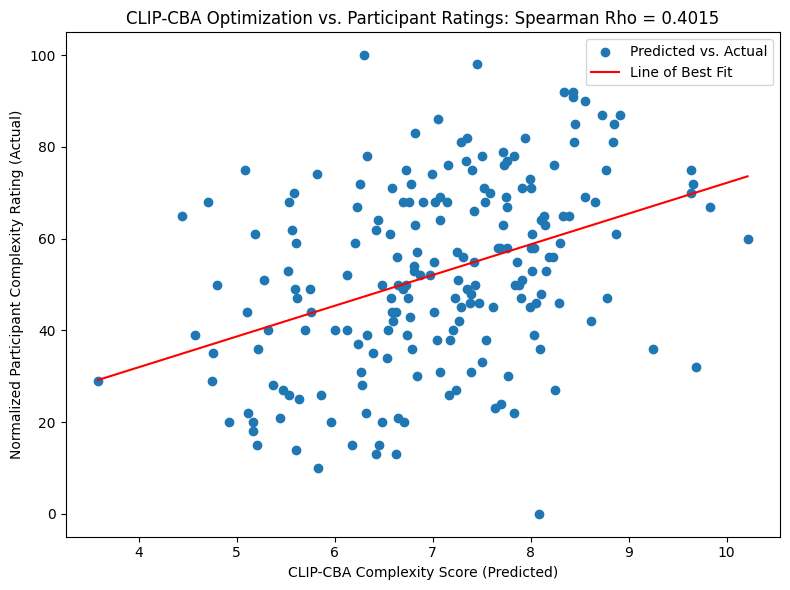

In [3]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_ad.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/advertisement/emb/static_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=False)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_ad.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/advertisement/emb/static_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-CBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

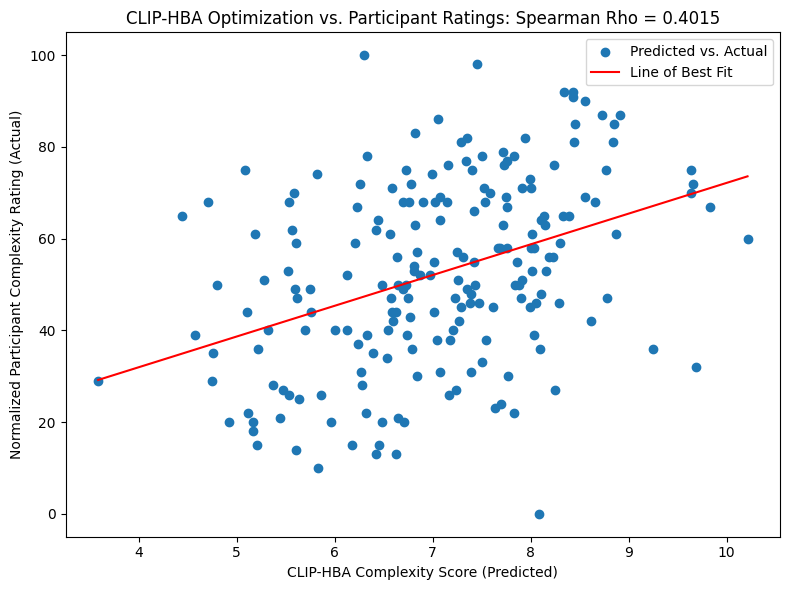

In [5]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

Results will be saved in: ./optimization_results_20241127_130620
Starting optimization without cross-validation...
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = -0.05701465806644216
Predictor 1: Initial Spearman rho = -0.08854516403710379
Predictor 2: Initial Spearman rho = 0.017940869641416626
Predictor 3: Initial Spearman rho = 0.014449629168599433
Predictor 4: Initial Spearman rho = -0.1654378219708846
Predictor 5: Initial Spearman rho = -0.025993603495247427
Predictor 6: Initial Spearman rho = 0.13596658497183595
Predictor 7: Initial Spearman rho = 0.2310690931666883
Predictor 8: Initial Spearman rho = 0.06036197244437022
Predictor 9: Initial Spearman rho = 0.053092773223042226
Predictor 10: Initial Spearman rho = 0.12008085361500957
Predictor 11: Initial Spearman rho = 0.3653604010722964
Predictor 12: Initial Spearman rho = -0.13156481148903357
Predictor 13: Initial Spearman rho = -0.02433233836735151
Predictor 14: Initial Spea

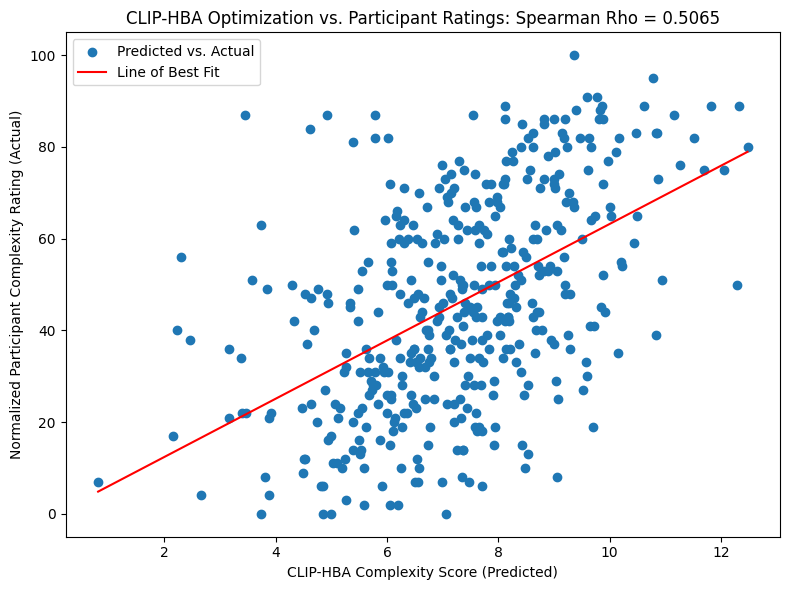

In [7]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_art.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/art/emb/static_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=False)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_art.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/art/emb/static_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

Results will be saved in: ./optimization_results_20241127_133207
Starting optimization without cross-validation...
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = -0.2846918231517379
Predictor 1: Initial Spearman rho = -0.035591247664797154
Predictor 2: Initial Spearman rho = 0.30486034298241266
Predictor 3: Initial Spearman rho = 0.16125896159490222
Predictor 4: Initial Spearman rho = -0.18117925687305764
Predictor 5: Initial Spearman rho = -0.05758819921479406
Predictor 6: Initial Spearman rho = 0.15240616390424863
Predictor 7: Initial Spearman rho = -0.21928529927167437
Predictor 8: Initial Spearman rho = -0.21714262213569924
Predictor 9: Initial Spearman rho = 0.17419304906836558
Predictor 10: Initial Spearman rho = 0.5531227997120365
Predictor 11: Initial Spearman rho = 0.14204689013199906
Predictor 12: Initial Spearman rho = -0.07270697710140857
Predictor 13: Initial Spearman rho = 0.32413843530944947
Predictor 14: Initial Spear

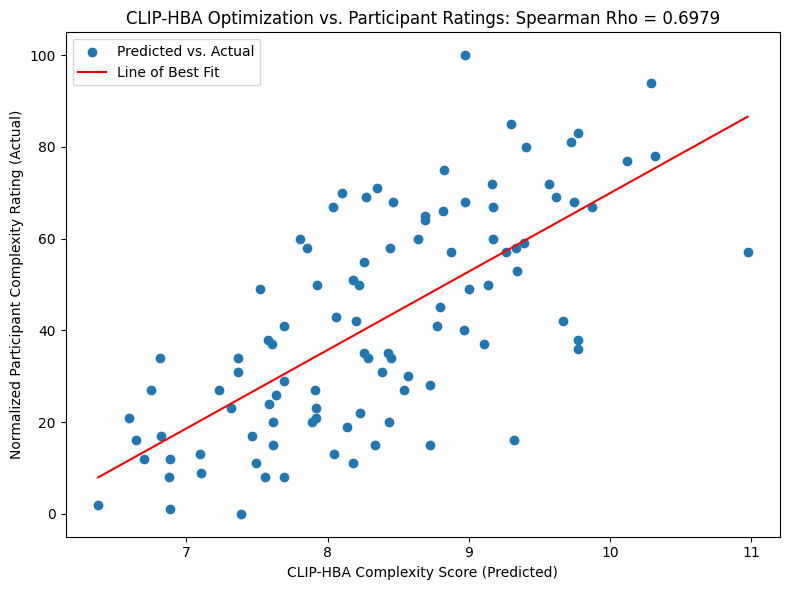

In [8]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_interior_design.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/interior_design/emb/static_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=False)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_interior_design.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/interior_design/emb/static_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

Results will be saved in: ./optimization_results_20241127_135409
Starting optimization without cross-validation...
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = 0.23510618603570504
Predictor 1: Initial Spearman rho = -0.06404655851695194
Predictor 2: Initial Spearman rho = -0.269945539466364
Predictor 3: Initial Spearman rho = 0.0021896964594038597
Predictor 4: Initial Spearman rho = 0.13013953427996544
Predictor 5: Initial Spearman rho = -0.11830737180851049
Predictor 6: Initial Spearman rho = 0.1163187163395555
Predictor 7: Initial Spearman rho = 0.3154168106493802
Predictor 8: Initial Spearman rho = 0.11060180071190329
Predictor 9: Initial Spearman rho = 0.11968765323547283
Predictor 10: Initial Spearman rho = 0.041316924149039314
Predictor 11: Initial Spearman rho = 0.27711100043937725
Predictor 12: Initial Spearman rho = 0.17846663774148477
Predictor 13: Initial Spearman rho = 0.024085160747543584
Predictor 14: Initial Spearman

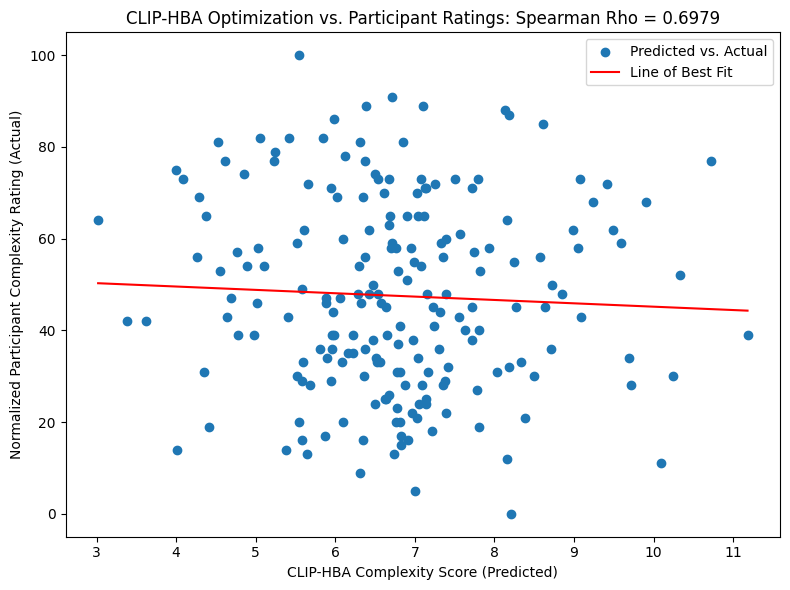

In [9]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_objects.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/objects/emb/static_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=False)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_objects.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/objects/emb/static_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

Results will be saved in: ./optimization_results_20241127_142303
Starting optimization without cross-validation...
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = 0.1226332457053409
Predictor 1: Initial Spearman rho = 0.09532890208803316
Predictor 2: Initial Spearman rho = -0.2567927082269885
Predictor 3: Initial Spearman rho = 0.1383543603047122
Predictor 4: Initial Spearman rho = 0.11176942065270473
Predictor 5: Initial Spearman rho = -0.2657578769332483
Predictor 6: Initial Spearman rho = -0.31546276466716755
Predictor 7: Initial Spearman rho = 0.034106049303832514
Predictor 8: Initial Spearman rho = -0.11279864092422916
Predictor 9: Initial Spearman rho = 0.20561825598001074
Predictor 10: Initial Spearman rho = 0.395282847590845
Predictor 11: Initial Spearman rho = 0.28307758365989266
Predictor 12: Initial Spearman rho = 0.147450056946282
Predictor 13: Initial Spearman rho = -0.05371824666442631
Predictor 14: Initial Spearman rho 

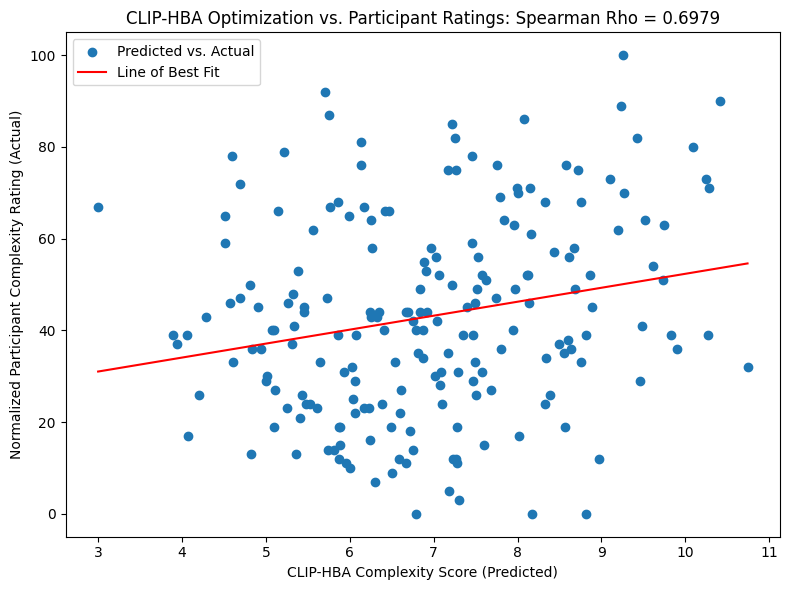

In [11]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_scenes.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/scenes/emb/static_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=False)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_scenes.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/scenes/emb/static_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

Results will be saved in: ./optimization_results_20241127_145000
Starting optimization without cross-validation...
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = -0.19239310994238362
Predictor 1: Initial Spearman rho = 0.1342940519407529
Predictor 2: Initial Spearman rho = 0.22372938905669293
Predictor 3: Initial Spearman rho = -0.00039612994092020964
Predictor 4: Initial Spearman rho = -0.6346901948862032
Predictor 5: Initial Spearman rho = 0.4065253508849642
Predictor 6: Initial Spearman rho = -0.062312440100509334
Predictor 7: Initial Spearman rho = 0.2800578662617864
Predictor 8: Initial Spearman rho = -0.3895217732694043
Predictor 9: Initial Spearman rho = -0.10086308571460793
Predictor 10: Initial Spearman rho = 0.5549180275411955
Predictor 11: Initial Spearman rho = 0.5341872272997045
Predictor 12: Initial Spearman rho = -0.13875351476050615
Predictor 13: Initial Spearman rho = 0.4324658600464361
Predictor 14: Initial Spearman

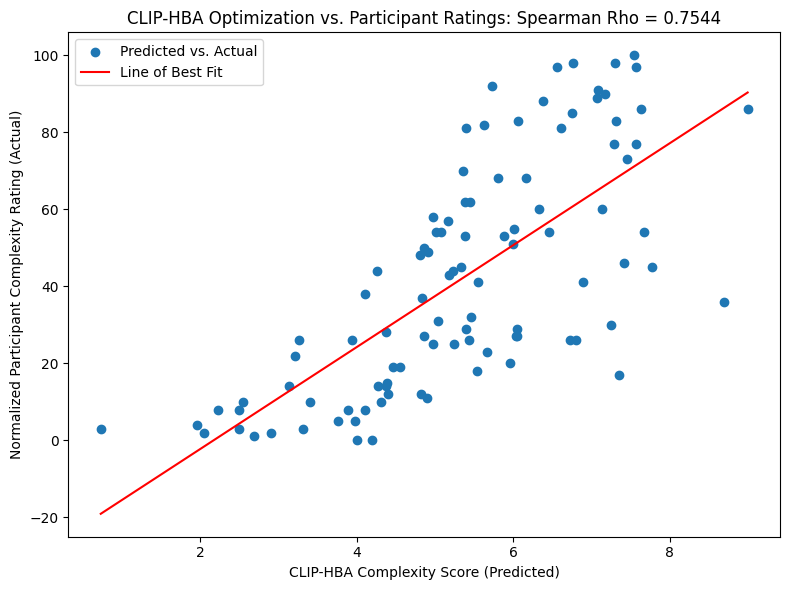

In [12]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_sup.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/suprematism/emb/static_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=False)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_sup.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/suprematism/emb/static_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

Results will be saved in: ./optimization_results_20241127_151115
Starting optimization without cross-validation...
Calculating initial Spearman correlations for each predictor...
Predictor 0: Initial Spearman rho = 0.04544511814645827
Predictor 1: Initial Spearman rho = -0.0006781285993265043
Predictor 2: Initial Spearman rho = -0.10019049998146744
Predictor 3: Initial Spearman rho = 0.03933145876093724
Predictor 4: Initial Spearman rho = 0.07496696662709387
Predictor 5: Initial Spearman rho = 0.09397107053786562
Predictor 6: Initial Spearman rho = 0.023959543653195293
Predictor 7: Initial Spearman rho = -0.09364100794527307
Predictor 8: Initial Spearman rho = 0.050698364364471005
Predictor 9: Initial Spearman rho = 0.04139510010689655
Predictor 10: Initial Spearman rho = 0.11071799640065788
Predictor 11: Initial Spearman rho = 0.17455210180805633
Predictor 12: Initial Spearman rho = 0.011061597705385654
Predictor 13: Initial Spearman rho = 0.038585067216324556
Predictor 14: Initial Sp

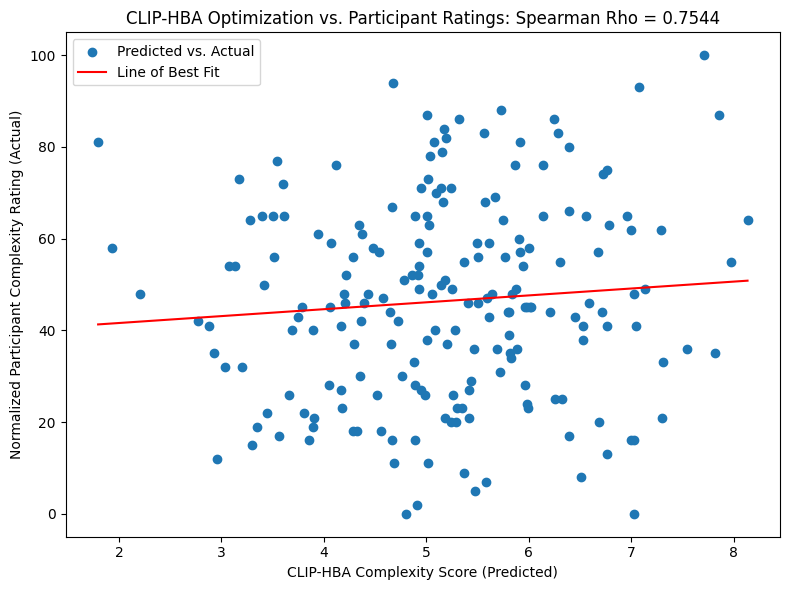

In [13]:
# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_vis.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/visualizations/emb/static_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    best_weights, best_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=False)
    all_weights.append(best_weights)
    spearman_rhos.append(best_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Savoias-Dataset/Ground truth/csv/global_ranking_vis.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-HBA/Dora49/Savoias/visualizations/emb/static_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()